In [ ]:
import pandas as pd
file_path = "project_data/cs-training.csv"
df = pd.read_csv(file_path)

In [ ]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


 Finding Missing Values

In [ ]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


When to Use MEAN
Use mean imputation if:
The data is normally distributed (symmetric, no strong skew).
There are no significant outliers that could distort the average.
Example: Heights of people in a population, standardized test scores.

When to Use MEDIAN
Use median imputation if:
The data is skewed (right or left).
There are outliers present.

In [ ]:
# Since the Plot of Monthly income is right skewed Use Median
median_income = df['MonthlyIncome'].median()
# Replace NaN values with the median
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(median_income)
# Confirm replacement
print("Missing MonthlyIncome values after replacement:", df['MonthlyIncome'].isnull().sum())

Missing MonthlyIncome values after replacement: 0


In [ ]:
#Substituting Null Values by Mode
mode_dependents = df['NumberOfDependents'].mode
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(mode_dependents)
#Confirm replacement
print("Missing NumberOfDependents values after replacement:", df['NumberOfDependents'].isnull().sum())

Missing NumberOfDependents values after replacement: 0


Now all NA Values are replaced by median and mode accordingly

Calculating Outliers

In [ ]:
def detect_outliers_iqr(df, columns=None):
    outlier_flags = pd.DataFrame()
    outlier_summary = {}

    if columns is None:
        columns = df.select_dtypes(include=['number']).columns

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Create outlier flag
        outlier_flags[col + '_outlier'] = (df[col] < lower) | (df[col] > upper)
        outlier_summary[col] = outlier_flags[col + '_outlier'].sum()

    # Combine with original dataframe if needed
    df_with_flags = pd.concat([df, outlier_flags], axis=1)

    return df_with_flags, pd.Series(outlier_summary).sort_values(ascending=False)


In [ ]:
df_with_outliers, outlier_counts = detect_outliers_iqr(df)
# Show rows with any outliers
outliers_only = df_with_outliers[df_with_outliers.filter(like='_outlier').any(axis=1)]
# Display
print(outlier_counts)


DebtRatio                               31311
NumberOfTime30-59DaysPastDueNotWorse    23982
SeriousDlqin2yrs                        10026
MonthlyIncome                            9149
NumberOfTimes90DaysLate                  8338
NumberOfTime60-89DaysPastDueNotWorse     7604
NumberOfOpenCreditLinesAndLoans          3980
NumberRealEstateLoansOrLines              793
RevolvingUtilizationOfUnsecuredLines      763
age                                        46
Unnamed: 0                                  0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_age_outliers(data):
    plt.figure(figsize=(14, 6))

    # Boxplot for outlier detection
    plt.subplot(1, 2, 1)
    sns.boxplot(x=data['age'], color='lightblue')
    plt.title('Boxplot of Age')
    plt.xlabel('Age')

    # Histogram for distribution
    plt.subplot(1, 2, 2)
    sns.histplot(data['age'], bins=30, kde=True, color='salmon')
    plt.title('Histogram of Age')
    plt.xlabel('Age')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

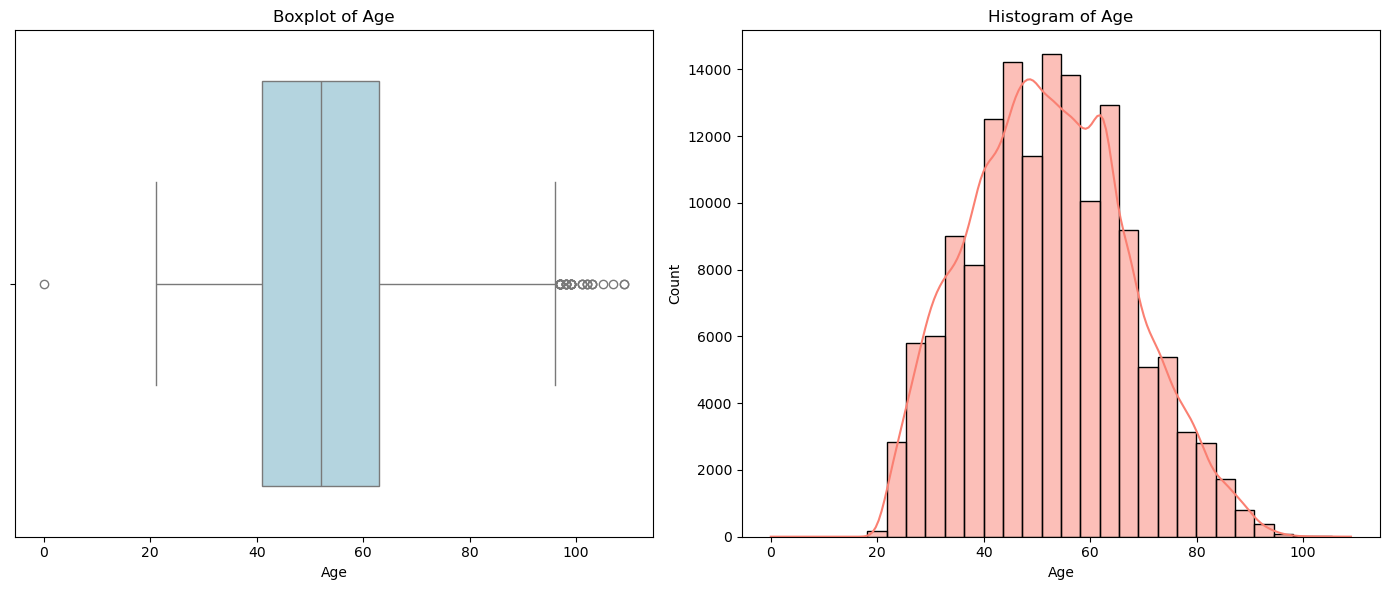

In [ ]:
plot_age_outliers(df)

AGE Column (Outliers Removed)

In [ ]:
def remove_age_outliers(df):
    # Calculate Q1 and Q3
    Q1 = df['age'].quantile(0.25)
    Q3 = df['age'].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for non-outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    cleaned_df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

    return cleaned_df


In [ ]:
df_cleaned = remove_age_outliers(df)
print(f"Original rows: {len(df)} | Cleaned rows: {len(df_cleaned)}")
df = df_cleaned


Original rows: 150000 | Cleaned rows: 149954


In [ ]:
def plot_DebtRatio_outliers(data):
    plt.figure(figsize=(14, 6))

    # Boxplot for outlier detection
    plt.subplot(1, 2, 1)
    sns.boxplot(x=data['DebtRatio'], color='lightblue')
    plt.title('Boxplot of DebtRatio')
    plt.xlabel('DebtRatio')

    # Histogram for distribution
    plt.subplot(1, 2, 2)
    sns.histplot(data['DebtRatio'], bins=30, kde=True, color='salmon')
    plt.title('Histogram of DebtRatio')
    plt.xlabel('plot_DebtRatio_outliers(df)')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

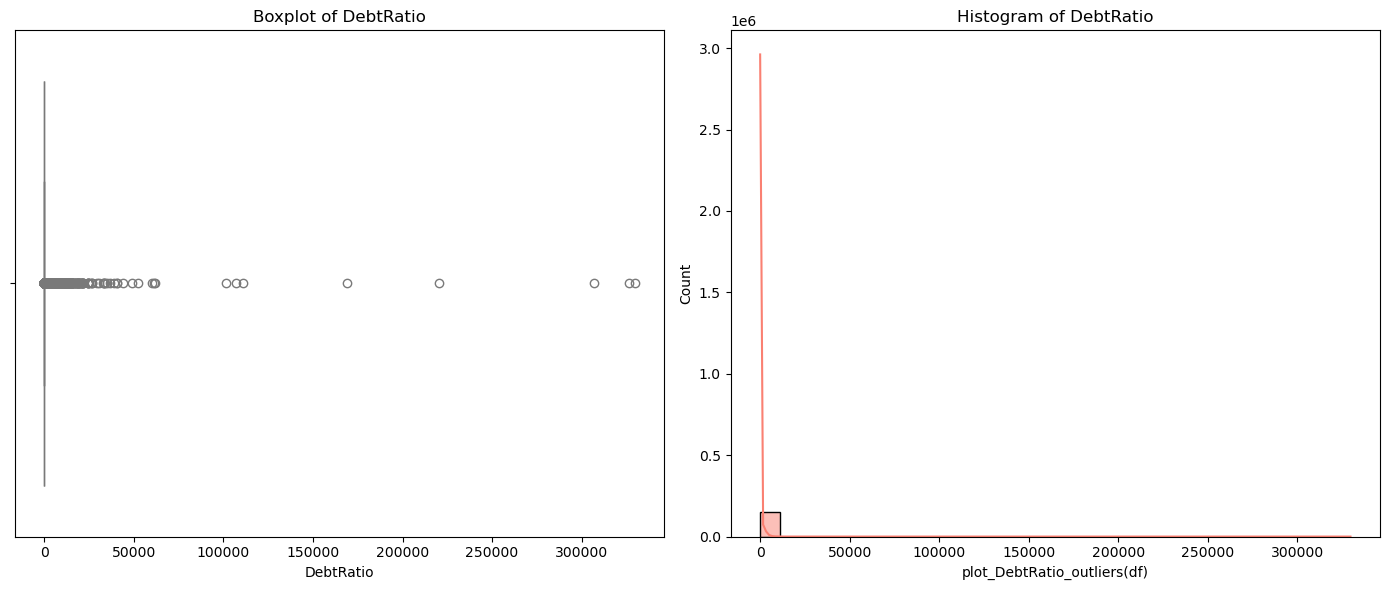

In [ ]:
plot_DebtRatio_outliers(df)

Remove DebtRatio Outliers

In [ ]:
def remove_debtratio_outliers(df):
    # Calculate Q1 and Q3
    Q1 = df['DebtRatio'].quantile(0.25)
    Q3 = df['DebtRatio'].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    cleaned_df = df[(df['DebtRatio'] >= lower_bound) & (df['DebtRatio'] <= upper_bound)]

    return cleaned_df


In [ ]:
df_cleaned_debt = remove_debtratio_outliers(df)
print(f"Original rows: {len(df)} | After removing DebtRatio outliers: {len(df_cleaned_debt)}")
df = df_cleaned_debt


Original rows: 149954 | After removing DebtRatio outliers: 118658


In [ ]:
def cap_monthly_income_outliers(df):

    #Step 1: Calculate 1st and 99th percentiles
    lower_cap = df['MonthlyIncome'].quantile(0.01)
    upper_cap = df['MonthlyIncome'].quantile(0.99)

    #Step 2: Cap values (no warning now)
    df.loc[:, 'MonthlyIncome'] = df['MonthlyIncome'].clip(lower=lower_cap, upper=upper_cap)

    return df


In [ ]:
df = cap_monthly_income_outliers(df)

In [ ]:
print(f"Original rows: {len(df)}")

Original rows: 118658


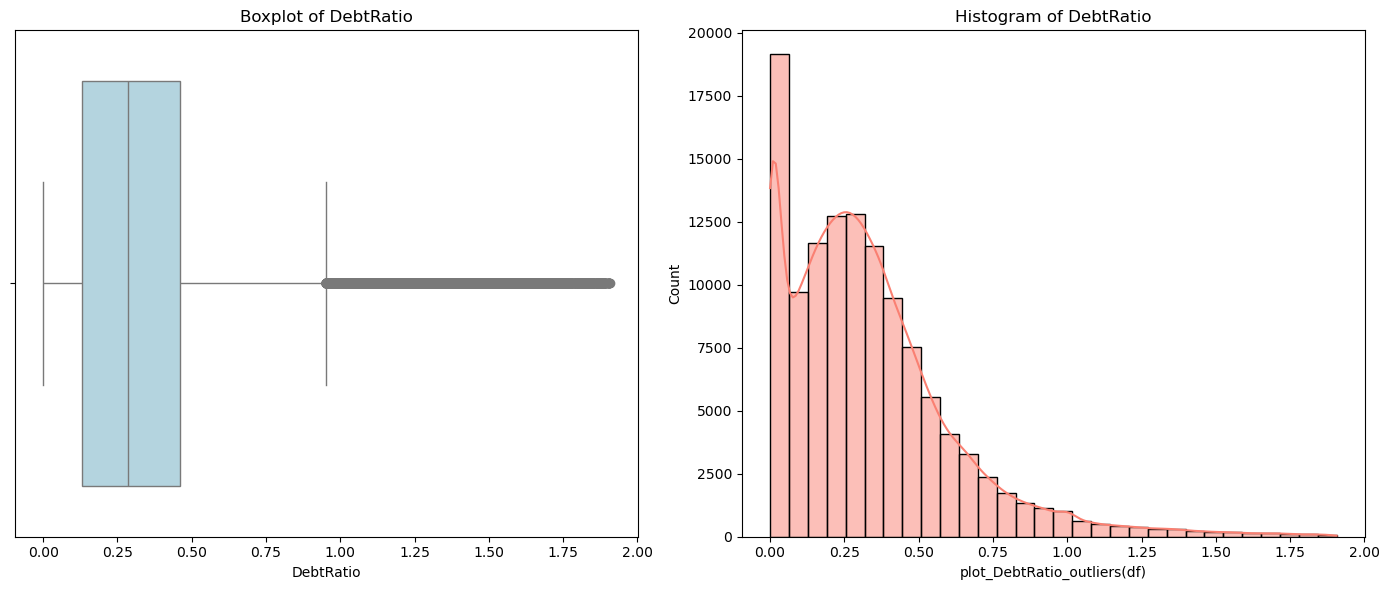

In [ ]:
plot_DebtRatio_outliers(df)

In [ ]:
def plot_monthly_income_boxplot(df):
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df['MonthlyIncome'], color='skyblue')
    plt.title('Boxplot of Monthly Income')
    plt.xlabel('Monthly Income')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

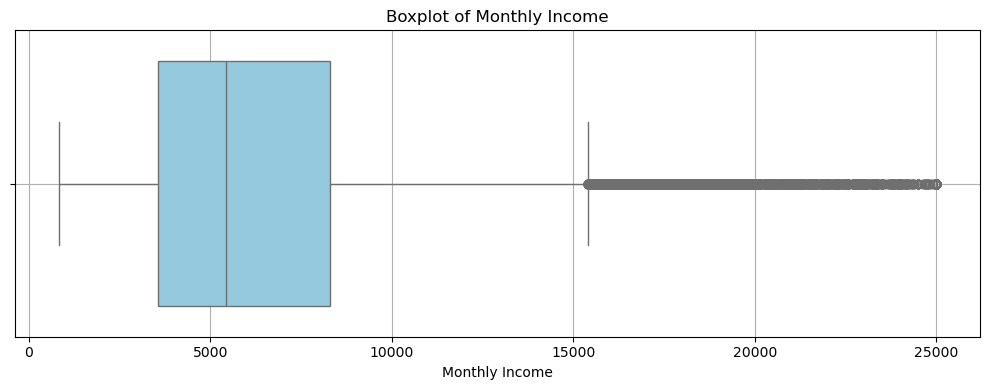

In [ ]:
plot_monthly_income_boxplot(df)


In [ ]:
def plot_monthly_income_bar(df, bin_size=1000):
    # Step 1: Bin the MonthlyIncome
    df = df.copy()
    df['IncomeRange'] = pd.cut(df['MonthlyIncome'],
                               bins=range(0, int(df['MonthlyIncome'].max()) + bin_size, bin_size),
                               right=False)

    # Step 2: Count number of records in each bin
    income_counts = df['IncomeRange'].value_counts().sort_index()

    # Step 3: Plot
    plt.figure(figsize=(14, 5))
    sns.barplot(x=income_counts.index.astype(str), y=income_counts.values, palette="viridis")
    plt.xticks(rotation=45, ha='right')
    plt.title('Bar Graph of Monthly Income Ranges')
    plt.xlabel('Monthly Income Range')
    plt.ylabel('Number of Records')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

C:\Users\aviko\AppData\Local\Temp\ipykernel_17164\927093401.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_counts.index.astype(str), y=income_counts.values, palette="viridis")


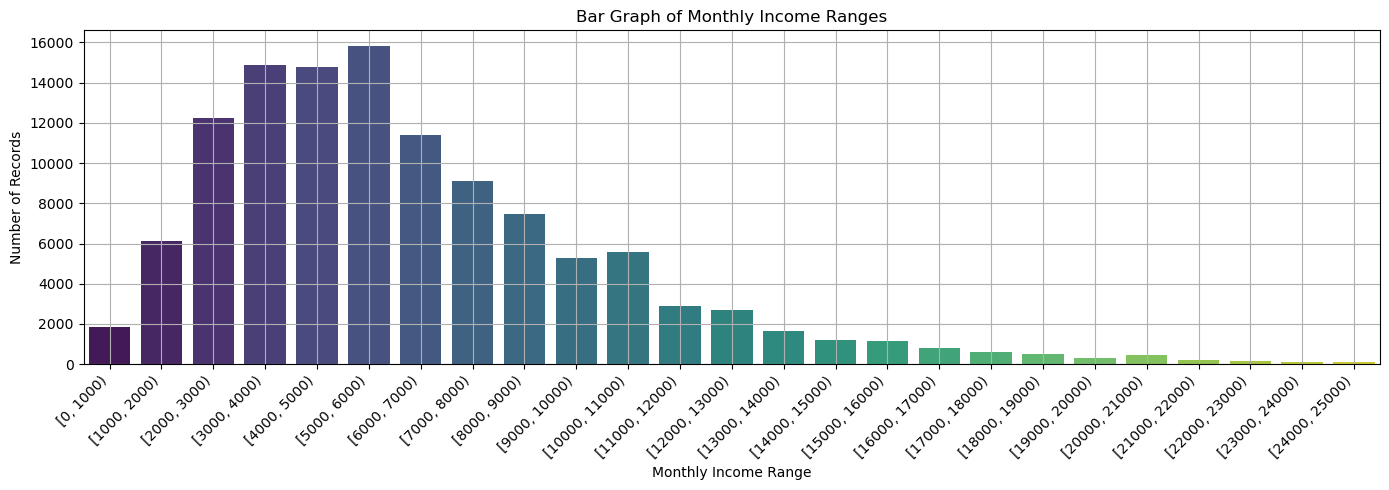

In [ ]:
plot_monthly_income_bar(df)


In [ ]:
# Handling Outliers of NumberOfTime30-59DaysPastDueNotWorse
#Step 1: Cap the values at 10
#This keeps the valid range and prevents distortion from invalid outliers.
df['NumberOfTime30-59DaysPastDueNotWorse'] = df['NumberOfTime30-59DaysPastDueNotWorse'].clip(upper=10)
#Step 2 (Optional): Flag the original outliers
#This helps your model know those records were extreme:
df['past_due_30_59_flag'] = (df['NumberOfTime30-59DaysPastDueNotWorse'] > 10).astype(int)


C:\Users\aviko\AppData\Local\Temp\ipykernel_17164\3984396998.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NumberOfTime30-59DaysPastDueNotWorse'] = df['NumberOfTime30-59DaysPastDueNotWorse'].clip(upper=10)
C:\Users\aviko\AppData\Local\Temp\ipykernel_17164\3984396998.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['past_due_30_59_flag'] = (df['NumberOfTime30-59DaysPastDueNotWorse'] > 10).astype(int)


In [ ]:
def plot_boxplots(df, columns):
    num_cols = len(columns)
    plt.figure(figsize=(5 * num_cols, 5))

    for i, col in enumerate(columns, 1):
        plt.subplot(1, num_cols, i)
        sns.boxplot(y=df[col], color='skyblue')
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)

    plt.tight_layout()
    plt.show()

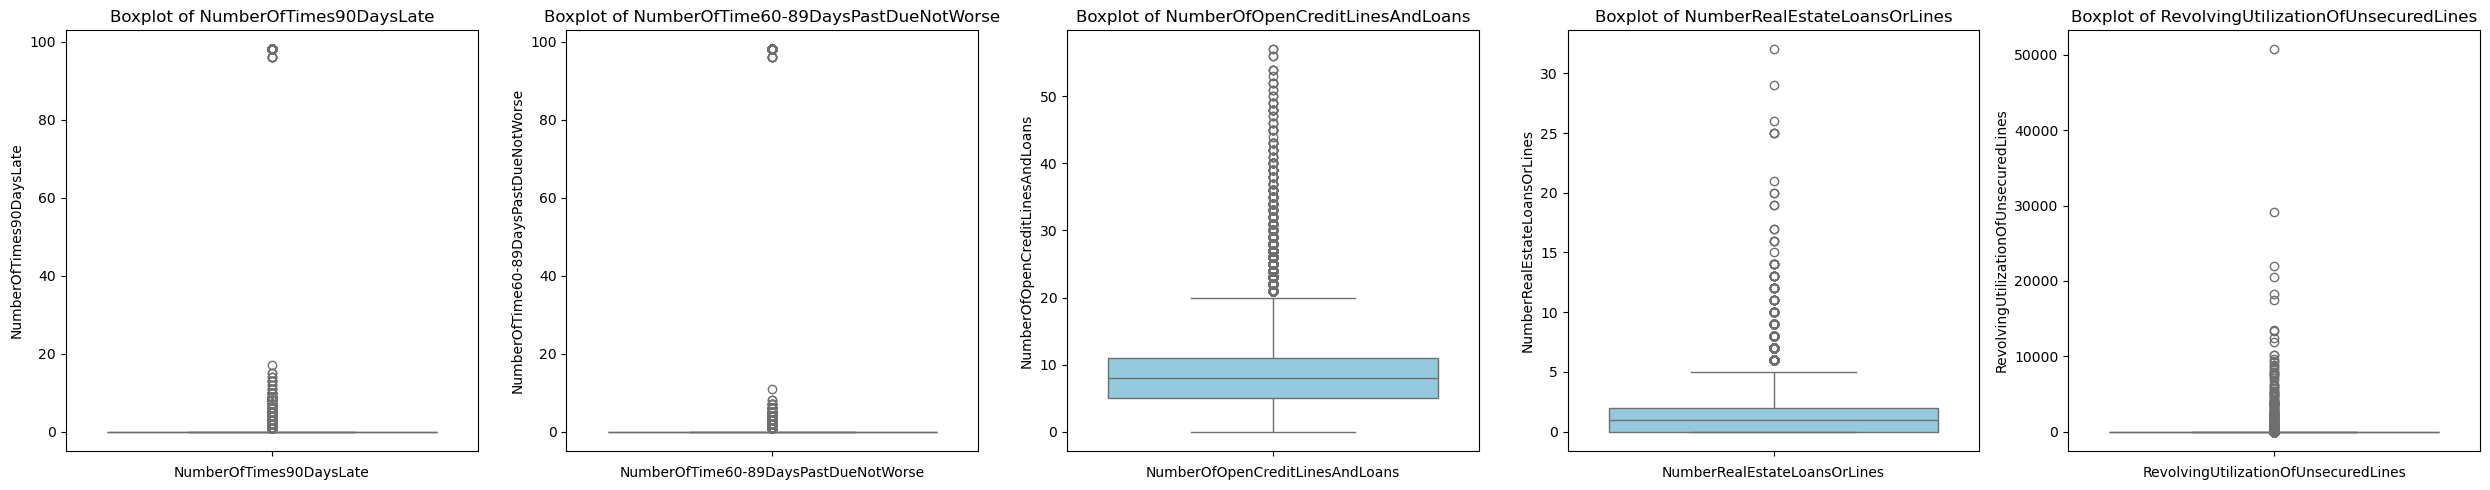

In [ ]:
cols_to_plot = [
    'NumberOfTimes90DaysLate',
    'NumberOfTime60-89DaysPastDueNotWorse',
    'NumberOfOpenCreditLinesAndLoans',
    'NumberRealEstateLoansOrLines',
    'RevolvingUtilizationOfUnsecuredLines'
]

plot_boxplots(df, cols_to_plot)

In [ ]:
def cap_and_flag_outliers(df):
    df = df.copy()

    # Define caps for each column
    cap_dict = {
        'NumberOfTimes90DaysLate': 10,
        'NumberOfTime60-89DaysPastDueNotWorse': 10,
        'NumberOfOpenCreditLinesAndLoans': 30,
        'NumberRealEstateLoansOrLines': 10,
        'RevolvingUtilizationOfUnsecuredLines': 1.0
    }

    for col, cap in cap_dict.items():
        flag_col = f'{col}_flag'
        df[flag_col] = (df[col] > cap).astype(int)
        df[col] = df[col].clip(upper=cap)

    return df


In [ ]:
df = cap_and_flag_outliers(df)


In [ ]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,past_due_30_59_flag,NumberOfTimes90DaysLate_flag,NumberOfTime60-89DaysPastDueNotWorse_flag,NumberOfOpenCreditLinesAndLoans_flag,NumberRealEstateLoansOrLines_flag,RevolvingUtilizationOfUnsecuredLines_flag
count,118658.000000,118658.000000,118658.000000,118658.000000,118658.000000,118658.000000,118658.000000,118658.000000,118658.000000,118658.000000,118658.000000,118658.0,118658.000000,118658.000000,118658.000000,118658.000000,118658.000000
mean,75002.534300,0.069595,0.331479,51.434425,0.278152,0.334946,6495.530086,8.642578,0.111598,1.029615,0.087116,0.0,0.002149,0.002039,0.002570,0.000539,0.022881
std,43293.127748,0.254464,0.349989,14.552861,0.836724,0.285955,4268.443117,5.107878,0.654224,1.091405,0.558173,0.0,0.046308,0.045115,0.050634,0.023218,0.149524
min,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,820.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37609.250000,0.000000,0.033746,41.000000,0.000000,0.131983,3560.000000,5.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,74946.000000,0.000000,0.176348,51.000000,0.000000,0.284149,5417.000000,8.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,112483.750000,0.000000,0.585999,62.000000,0.000000,0.459737,8300.000000,11.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,150000.000000,1.000000,1.000000,96.000000,10.000000,1.906765,25000.000000,30.000000,10.000000,10.000000,10.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,past_due_30_59_flag,NumberOfTimes90DaysLate_flag,NumberOfTime60-89DaysPastDueNotWorse_flag,NumberOfOpenCreditLinesAndLoans_flag,NumberRealEstateLoansOrLines_flag,RevolvingUtilizationOfUnsecuredLines_flag
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,0,0,0,0,0,0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,0,0,0,0,0,0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,0,0,0,0,0,0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,0,0,0,0,0,0
4,5,0,0.907239,49,1,0.024926,25000.0,7,0,1,0,0.0,0,0,0,0,0,0


In [ ]:
cleaned_dataSet = df
output_path = "project_data/cleaned_dataSet.csv"
df_cleaned.to_csv(output_path, index=False)
output_path

'project_data/cleaned_dataSet.csv'

In [ ]:
cleaned_dataSet["SeriousDlqin2yrs"].value_counts()

SeriousDlqin2yrs
0    110400
1      8258
Name: count, dtype: int64

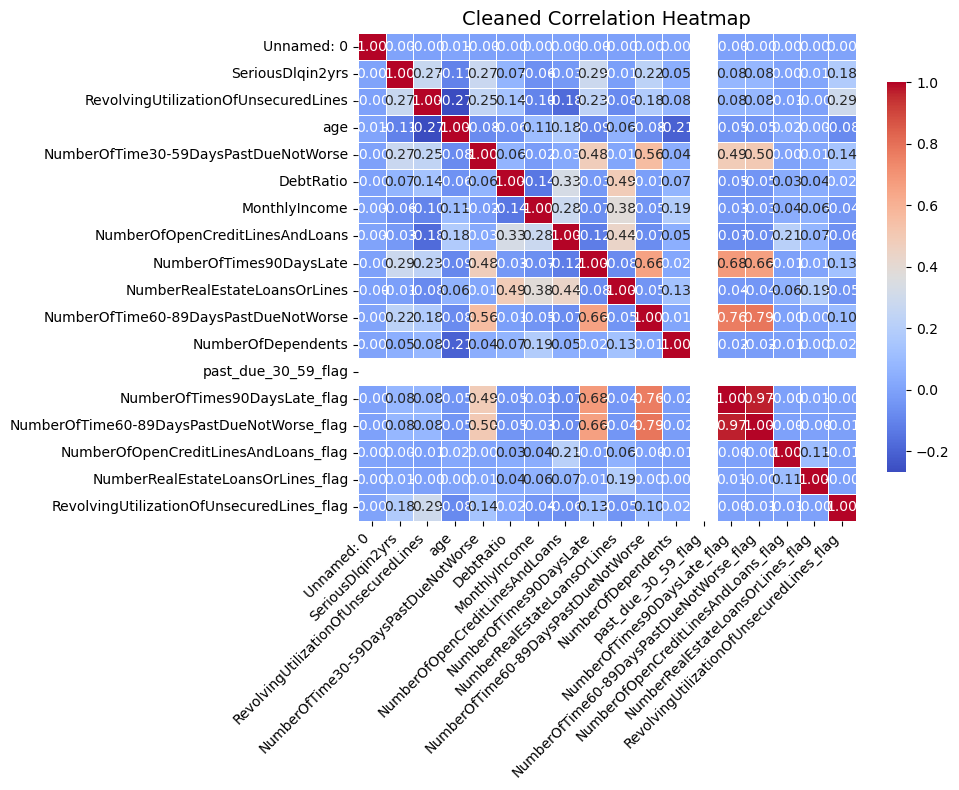

In [ ]:
# Convert object columns to numeric if needed
df['NumberOfDependents'] = pd.to_numeric(df['NumberOfDependents'], errors='coerce')

# Drop non-numeric columns (if any slipped in)
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Drop rows with NaNs to get clean correlation values
df_numeric = df_numeric.dropna()

# Compute correlation
corr = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, linecolor='white', cbar_kws={"shrink": 0.8})
plt.title("Cleaned Correlation Heatmap", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
"""
Features with high correlations might introduce multicollinearity in linear models. Either:
Drop one
Combine into a new engineered feature (like TotalLatePayments)
"""

'\nFeatures with high correlations might introduce multicollinearity in linear models. Either:\nDrop one\nCombine into a new engineered feature (like TotalLatePayments)\n'

In [ ]:
"""
We will Combine into a new engineered feature (like TotalLatePayments)
"""
df['TotalLatePayments'] = (
    df['NumberOfTime30-59DaysPastDueNotWorse'] +
    df['NumberOfTime60-89DaysPastDueNotWorse'] +
    df['NumberOfTimes90DaysLate']
)
df.drop(['NumberOfTime30-59DaysPastDueNotWorse',
         'NumberOfTime60-89DaysPastDueNotWorse',
         'NumberOfTimes90DaysLate'], axis=1, inplace=True)

In [ ]:
df.to_csv("project_data/cleaned_df.csv")

In [ ]:
import os
os.makedirs("Plots", exist_ok=True)


In [ ]:
# === Re-import libraries ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
from scipy.stats import uniform, randint
from sklearn.metrics import log_loss, confusion_matrix
from scipy.stats import ks_2samp
from sklearn.metrics import average_precision_score


# === Step 1: Load Dataset ===
df = pd.read_csv('project_data/cleaned_dataSet.csv')   # <== Update path if needed

numeric_columns = ['DebtRatio', 'MonthlyIncome', 'RevolvingUtilizationOfUnsecuredLines',
                   'NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines', 'NumberOfDependents']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# === Step 2: Engineered Features ===
df['FinancialPressure'] = df['DebtRatio'] * (df['MonthlyIncome'] / (df['RevolvingUtilizationOfUnsecuredLines'] + 0.01))
df['ActiveCreditBurden'] = df['NumberOfOpenCreditLinesAndLoans'] + df['NumberRealEstateLoansOrLines']
df['IncomePerDependent'] = df['MonthlyIncome'] / (df['NumberOfDependents'] + 1)
df['HighUtilizationFlag'] = (df['RevolvingUtilizationOfUnsecuredLines'] > 0.8).astype(int)

# === Step 3: Define X and y ===
X = df.drop(columns=['SeriousDlqin2yrs', 'Unnamed: 0', 'id', 'ID'], errors='ignore')
X = X.dropna()
y = df.loc[X.index, 'SeriousDlqin2yrs']

# === Step 4: Preprocessing Pipeline ===
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# === Step 5: Models ===
ratio = float(np.sum(y == 0)) / np.sum(y == 1)

models = {
    "XGBoost": XGBClassifier(eval_metric='logloss', random_state=42, scale_pos_weight=ratio, n_jobs=1),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced')
}

# === Step 6: Hyperparameter Spaces ===
param_grids = {
    "XGBoost": {
        'model__n_estimators': randint(50, 200),
        'model__max_depth': randint(3, 10),
        'model__learning_rate': uniform(0.01, 0.2)
    },
    "Logistic Regression": {
        'model__C': uniform(0.01, 10)
    },
    "Random Forest": {
        'model__n_estimators': randint(50, 200),
        'model__max_depth': randint(3, 10),
        'model__min_samples_split': randint(2, 10)
    }
}

# === Step 7: Create folder for plots (Optional) ===
os.makedirs("Plots", exist_ok=True)

# === Step 8: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# === Step 9: Cross-validation Object ===
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# === Step 10: Full Model Training and Evaluation ===
full_results = {}

for name, model in models.items():
    print(f"Training {name}...")

    # Create pipeline
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    # Randomized Search CV
    search = RandomizedSearchCV(
        pipe,
        param_distributions=param_grids[name],
        n_iter=20,
        scoring='roc_auc',
        n_jobs=-1,
        cv=cv,
        random_state=42
    )

    # --- Start Timer ---
    start_time = time.time()
    search.fit(X_train, y_train)
    end_time = time.time()
    elapsed_time = end_time - start_time

    # Predict
    y_pred = search.best_estimator_.predict(X_test)
    y_proba = search.best_estimator_.predict_proba(X_test)[:, 1]

    # === METRICS CALCULATION ===

    # 1. ROC-AUC
    roc_auc = roc_auc_score(y_test, y_proba)

    # 2. PR-AUC (Average Precision)
    pr_auc = average_precision_score(y_test, y_proba)

    # 3. Standard Metrics
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # 4. Diagnostics
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    ll = log_loss(y_test, y_proba)
    ks_stat = ks_2samp(y_proba[y_test == 1], y_proba[y_test == 0]).statistic

    # === SAVE RESULTS ===
    full_results[name] = {
        'ROC-AUC Score': round(roc_auc, 4),
        'PR-AUC Score': round(pr_auc, 4),
        'KS Statistic': round(ks_stat, 4),
        'F1-Score': round(f1, 4),
        'Recall (Sensitivity)': round(recall, 4),
        'Specificity': round(specificity, 4),
        'Precision': round(precision, 4),
        'Log Loss': round(ll, 4),
        'Training Time (sec)': round(elapsed_time, 2)
    }

# Print Final
final_results_df = pd.DataFrame(full_results).T
print(final_results_df)

Training XGBoost...
Training Logistic Regression...
Training Random Forest...
                     ROC-AUC Score  PR-AUC Score  KS Statistic  F1-Score  \
XGBoost                     0.8656        0.3970        0.5844    0.3370   
Logistic Regression         0.8208        0.3310        0.5031    0.3234   
Random Forest               0.8603        0.3852        0.5696    0.3359   

                     Recall (Sensitivity)  Specificity  Precision  Log Loss  \
XGBoost                            0.7882       0.7911     0.2143    0.4573   
Logistic Regression                0.6709       0.8209     0.2130    0.5501   
Random Forest                      0.7542       0.8022     0.2161    0.4469   

                     Training Time (sec)  
XGBoost                            43.91  
Logistic Regression                13.73  
Random Forest                     184.57  


In [ ]:
final_results_df

,ROC-AUC Score,PR-AUC Score,KS Statistic,F1-Score,Recall (Sensitivity),Specificity,Precision,Log Loss,Training Time (sec)
XGBoost,0.8656,0.3970,0.5844,0.3370,0.7882,0.7911,0.2143,0.4573,43.91
Logistic Regression,0.8208,0.3310,0.5031,0.3234,0.6709,0.8209,0.2130,0.5501,13.73
Random Forest,0.8603,0.3852,0.5696,0.3359,0.7542,0.8022,0.2161,0.4469,184.57


In [ ]:
import shap
import matplotlib.pyplot as plt
import os
import random

# === Step 12: Select the final best model based on highest ROC-AUC ===
best_model_name = final_results_df['ROC-AUC Score'].idxmax()

print(f"\nBest Model Based on ROC-AUC: {best_model_name}")

# Now re-train that best model properly
# (Since RandomizedSearchCV fitted it, we can access it easily)

# Re-run the randomized search only for best model
best_model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', models[best_model_name])
])

search_best = RandomizedSearchCV(
    best_model_pipeline,
    param_distributions=param_grids[best_model_name],
    n_iter=20,
    scoring='roc_auc',
    n_jobs=-1,
    cv=cv,
    random_state=42
)

# Fit again on the entire TRAINING set
start_time = time.time()
search_best.fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Retraining {best_model_name} took {elapsed_time:.2f} seconds.")

# Finally save the best pipeline
final_model = search_best.best_estimator_

# === Preprocessing: Transform X ===
fitted_preprocessor = final_model.named_steps['preprocessor']
X_transformed = fitted_preprocessor.transform(X)

# === SHAP Explainer (TreeExplainer preferred for XGBoost) ===
start_time = time.time()
explainer = shap.Explainer(final_model.named_steps['model'], X_transformed, feature_names=X.columns)
shap_values = explainer(X_transformed)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"SHAP Explainer fitting took {elapsed_time:.2f} seconds.")



Best Model Based on ROC-AUC: XGBoost
Retraining XGBoost took 33.17 seconds.


 99%|===================| 145296/146043 [01:20<00:00]        

SHAP Explainer fitting took 79.94 seconds.


Best Threshold: 0.7315
Best F1-Score: 0.4228
Recall at Best Threshold: 0.5038
Precision at Best Threshold: 0.3643


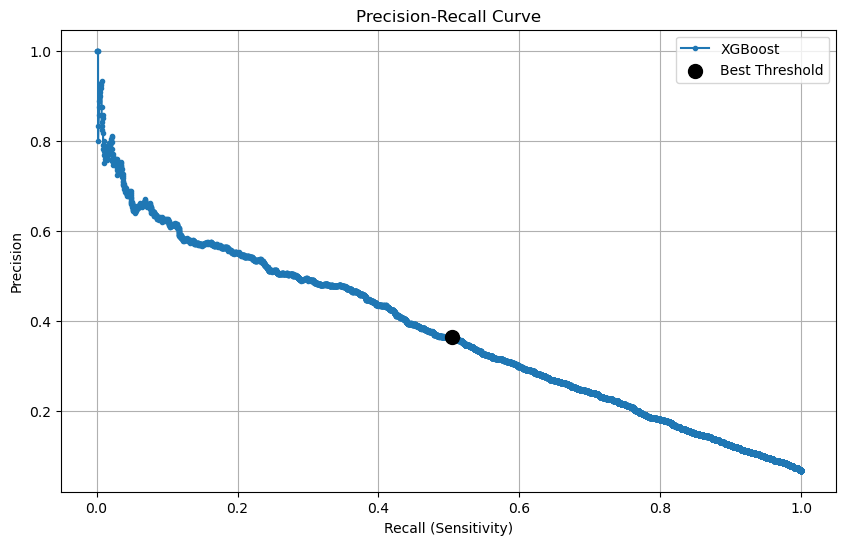

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# === 1. Train the best model (XGBoost) ===
# We re-fit it here to ensure we have the specific instance ready
xgb_model = models["XGBoost"]
# Note: If using a pipeline, ensure preprocessing is applied.
# Since you had a pipeline loop, let's just use the raw X_train/X_test
# assuming they are already processed, OR fit a new pipeline:
full_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])
full_pipe.fit(X_train, y_train)

# === 2. Get Probabilities ===
# We need the probability of "1" (default), not just the hard prediction
y_scores = full_pipe.predict_proba(X_test)[:, 1]

# === 3. Calculate Precision, Recall, and Thresholds ===
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# === 4. Find the "Optimal" Threshold (Best F1 Score) ===
# F1 = 2 * (precision * recall) / (precision + recall)
f1_scores = 2 * (precision * recall) / (precision + recall)
best_index = np.argmax(f1_scores)
best_thresh = thresholds[best_index]
best_f1 = f1_scores[best_index]

print(f"Best Threshold: {best_thresh:.4f}")
print(f"Best F1-Score: {best_f1:.4f}")
print(f"Recall at Best Threshold: {recall[best_index]:.4f}")
print(f"Precision at Best Threshold: {precision[best_index]:.4f}")

# === 5. Plot the Curve ===
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='XGBoost')
plt.scatter(recall[best_index], precision[best_index], marker='o', color='black', label='Best Threshold', s=100, zorder=5)

plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

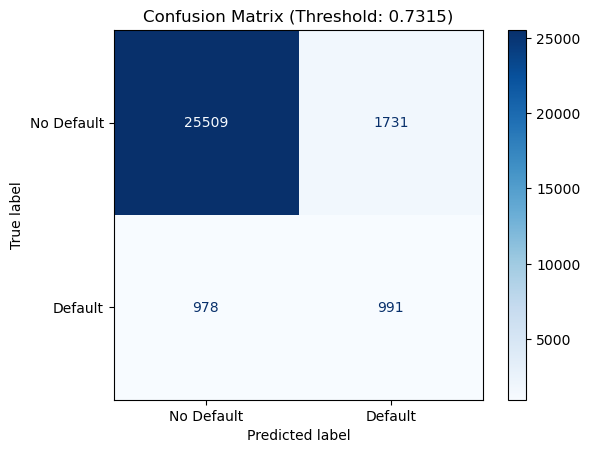

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_optimized = (y_scores > best_thresh).astype(int)

cm = confusion_matrix(y_test, y_pred_optimized)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Default", "Default"])
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (Threshold: {best_thresh:.4f})")
plt.show()

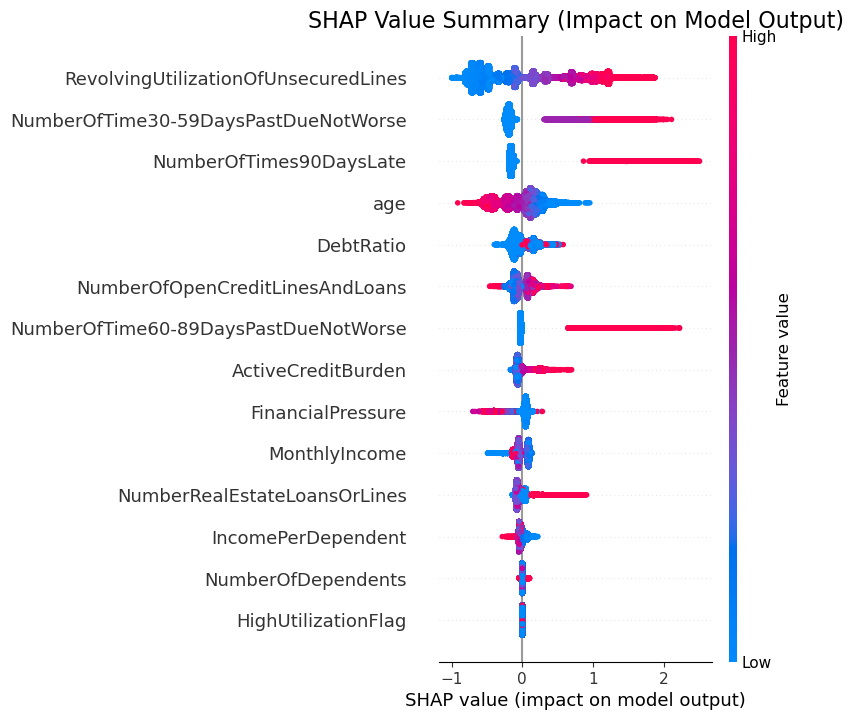

In [ ]:
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_transformed, show=False)
plt.title("SHAP Value Summary (Impact on Model Output)", fontsize=16)
plt.show()